# Classification

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
%pwd
%cd '/Users/chaitanya/Desktop'
df = pd.read_csv('income_evaluation.csv')
df

/Users/chaitanya/Desktop


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [111]:
correlation = df.corr()
correlation

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


#### Based on the correlation matrix we can interpret that the variables do not have any high correlations inorder to eliminate them.

In [112]:
df1 = pd.read_csv('income_evaluation.csv')
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [113]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
?                     1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [114]:
df.workclass = df.workclass.replace({'?': 'unknown'})

In [115]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
unknown               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

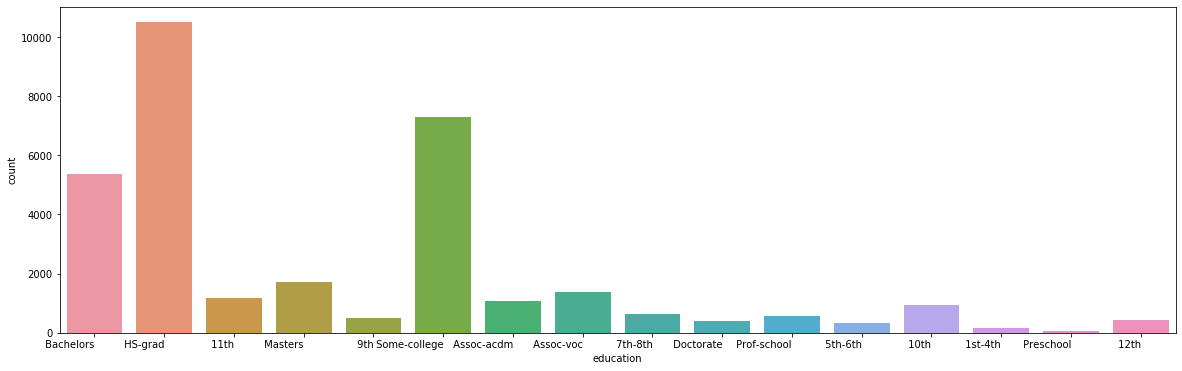

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(20,6))
ax = sns.countplot(df1['education']);
plt.xticks(rotation = 0, ha='right')


In [117]:
df = pd.concat((df, pd.get_dummies(df['workclass'])),axis=1)

In [118]:
df = df.drop('workclass', axis=1)

In [119]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [120]:
df = pd.concat((df, pd.get_dummies(df['education'])),axis=1)
df

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0,0,0,1,0,0,0,0,0,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,1,0,0,0,0,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,0,1,0,0,0,0,0,0,0,0
32557,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,0,0,0,0,0,1,0,0,0,0
32558,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,0,0,0,0,0,1,0,0,0,0
32559,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,0,0,0,0,0,1,0,0,0,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 39 columns):
age                  32561 non-null int64
fnlwgt               32561 non-null int64
education            32561 non-null object
education-num        32561 non-null int64
marital-status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
race                 32561 non-null object
sex                  32561 non-null object
capital-gain         32561 non-null int64
capital-loss         32561 non-null int64
hours-per-week       32561 non-null int64
native-country       32561 non-null object
income               32561 non-null object
 Federal-gov         32561 non-null uint8
 Local-gov           32561 non-null uint8
 Never-worked        32561 non-null uint8
 Private             32561 non-null uint8
 Self-emp-inc        32561 non-null uint8
 Self-emp-not-inc    32561 non-null uint8
 State-gov           32561 non-null uint8
 

In [122]:
df = df.drop('education', axis=1)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

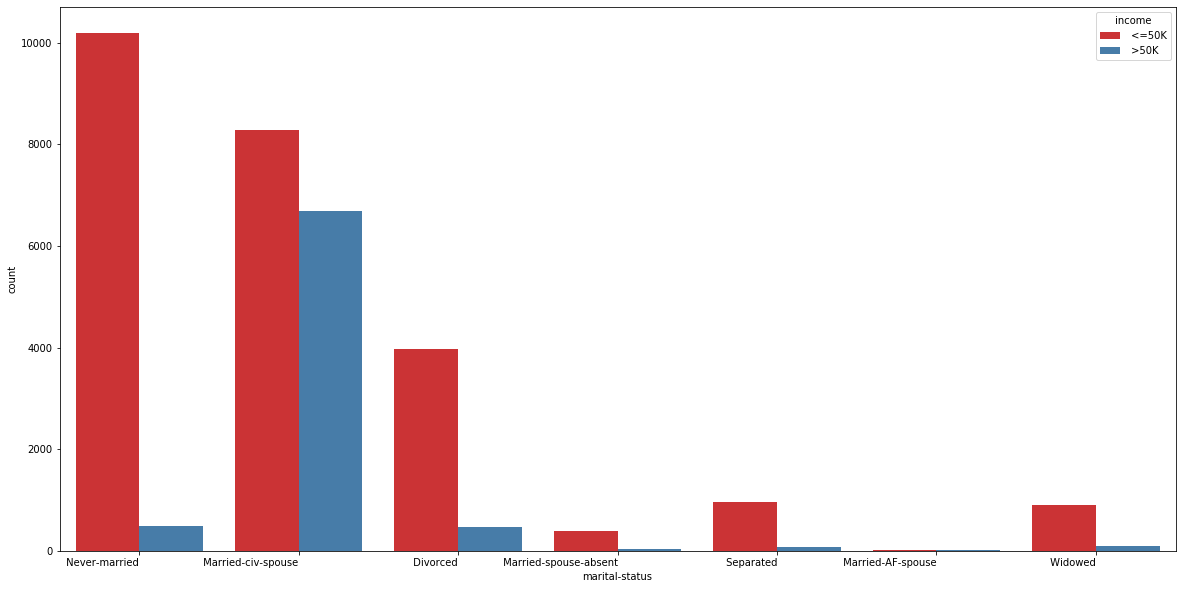

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns 


plt.figure(figsize=(20,10))
ax = sns.countplot(df1['marital-status'],hue = df1.income,palette="Set1")
plt.xticks(rotation = 0, ha='right')

In [124]:
df = pd.concat((df, pd.get_dummies(df['marital-status'])),axis=1)

In [125]:
df = df.drop('marital-status', axis=1)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 44 columns):
age                       32561 non-null int64
fnlwgt                    32561 non-null int64
education-num             32561 non-null int64
occupation                32561 non-null object
relationship              32561 non-null object
race                      32561 non-null object
sex                       32561 non-null object
capital-gain              32561 non-null int64
capital-loss              32561 non-null int64
hours-per-week            32561 non-null int64
native-country            32561 non-null object
income                    32561 non-null object
 Federal-gov              32561 non-null uint8
 Local-gov                32561 non-null uint8
 Never-worked             32561 non-null uint8
 Private                  32561 non-null uint8
 Self-emp-inc             32561 non-null uint8
 Self-emp-not-inc         32561 non-null uint8
 State-gov                32561 non-nul

In [127]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
?                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

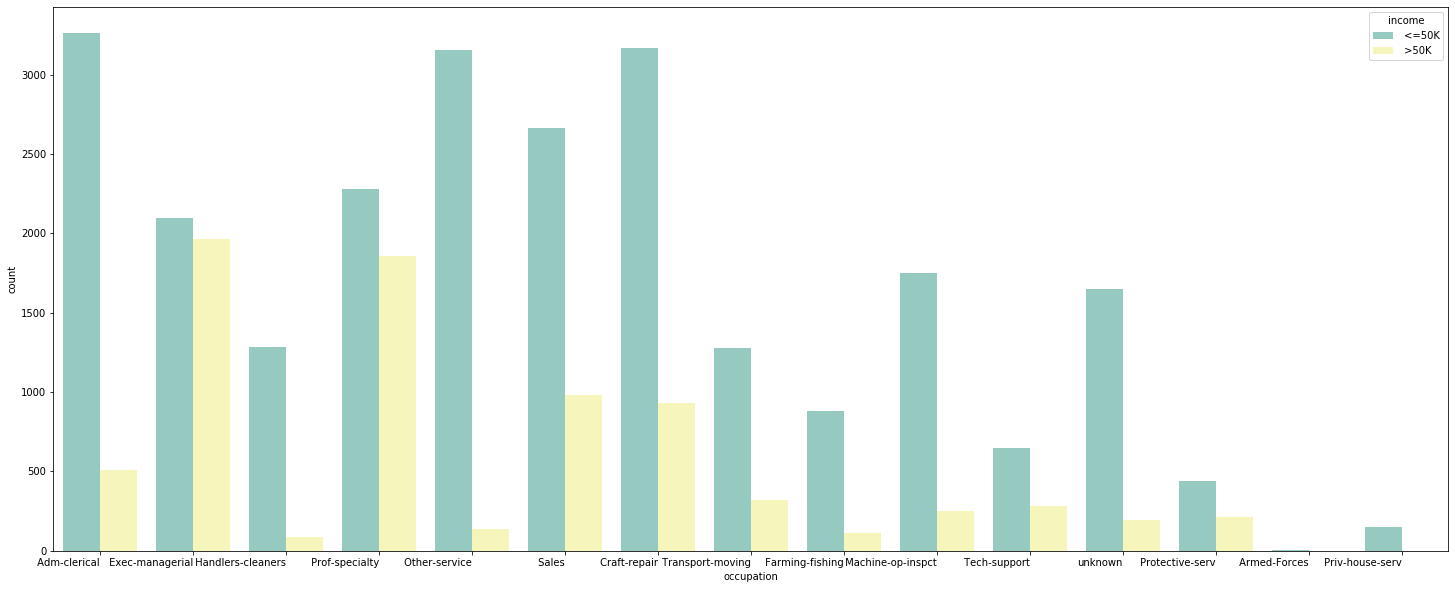

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns 

df1.occupation = df1.occupation.replace({'?': 'unknown'})

plt.figure(figsize=(25,10))
ax = sns.countplot(df1['occupation'],hue = df1.income,palette="Set3")
plt.xticks(rotation = 0, ha='right')

In [129]:
df.occupation = df.occupation.replace({'?': 'unknown'})

In [130]:
df = pd.concat((df, pd.get_dummies(df['occupation'])),axis=1)

In [131]:
df = df.drop('occupation',axis=1)

In [132]:
df = pd.concat((df, pd.get_dummies(df['relationship'])),axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

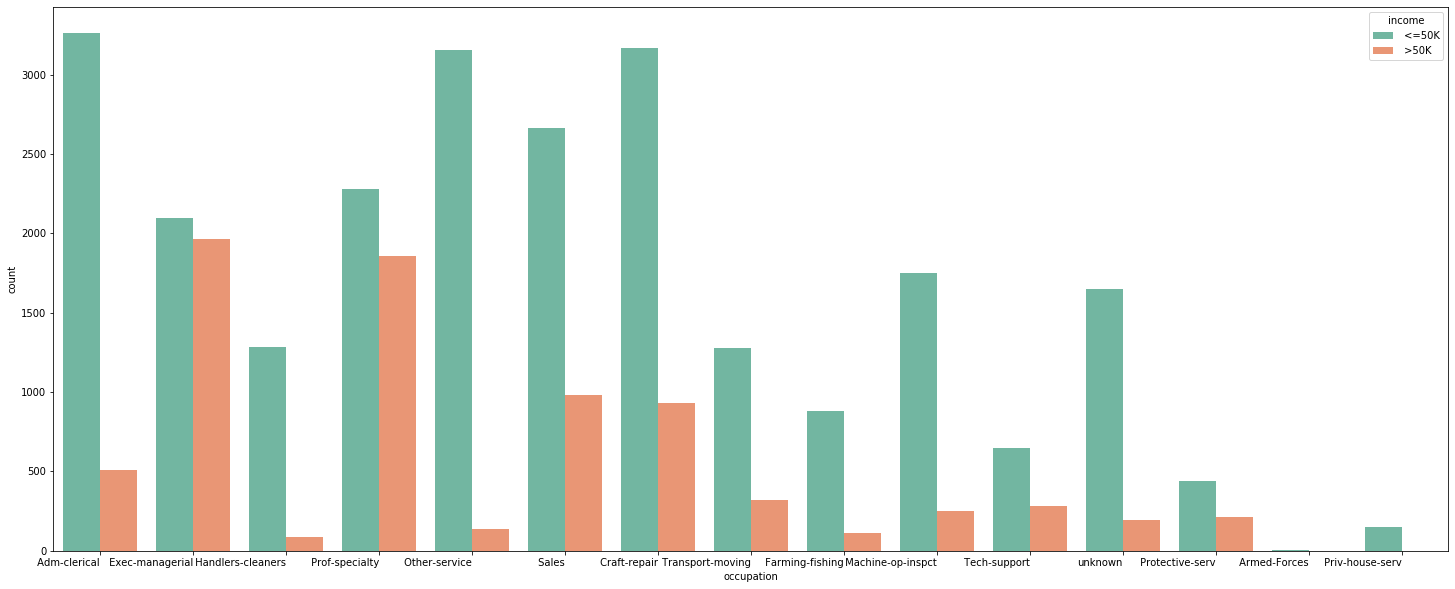

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns 

df1.relationship = df1.relationship.replace({'?': 'unknown'})

plt.figure(figsize=(25,10))
ax = sns.countplot(df1['occupation'],hue = df1.income,palette = 'Set2')
plt.xticks(rotation = 0, ha='right')

In [134]:
df = df.drop('relationship',axis=1)

In [135]:
df = pd.concat((df, pd.get_dummies(df['race'])),axis=1)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

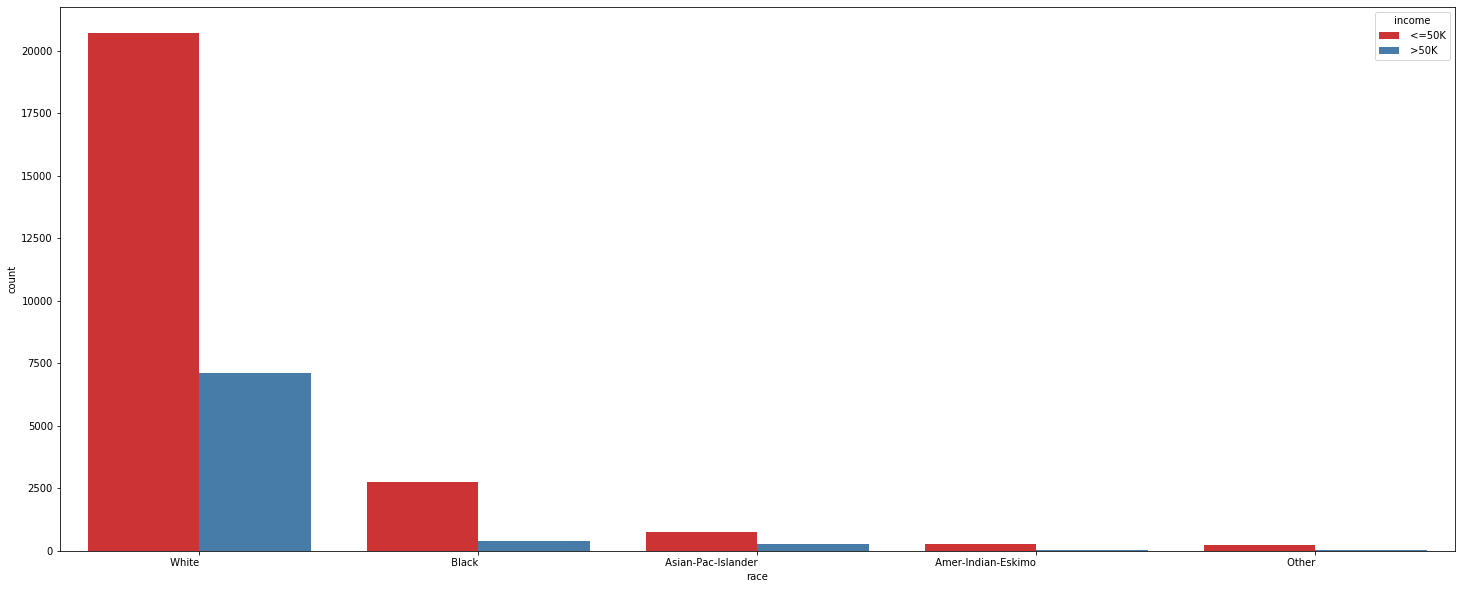

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(25,10))
ax = sns.countplot(df1['race'],hue = df1.income,palette = 'Set1')
plt.xticks(rotation = 0, ha='right')

In [137]:
df = df.drop('race',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

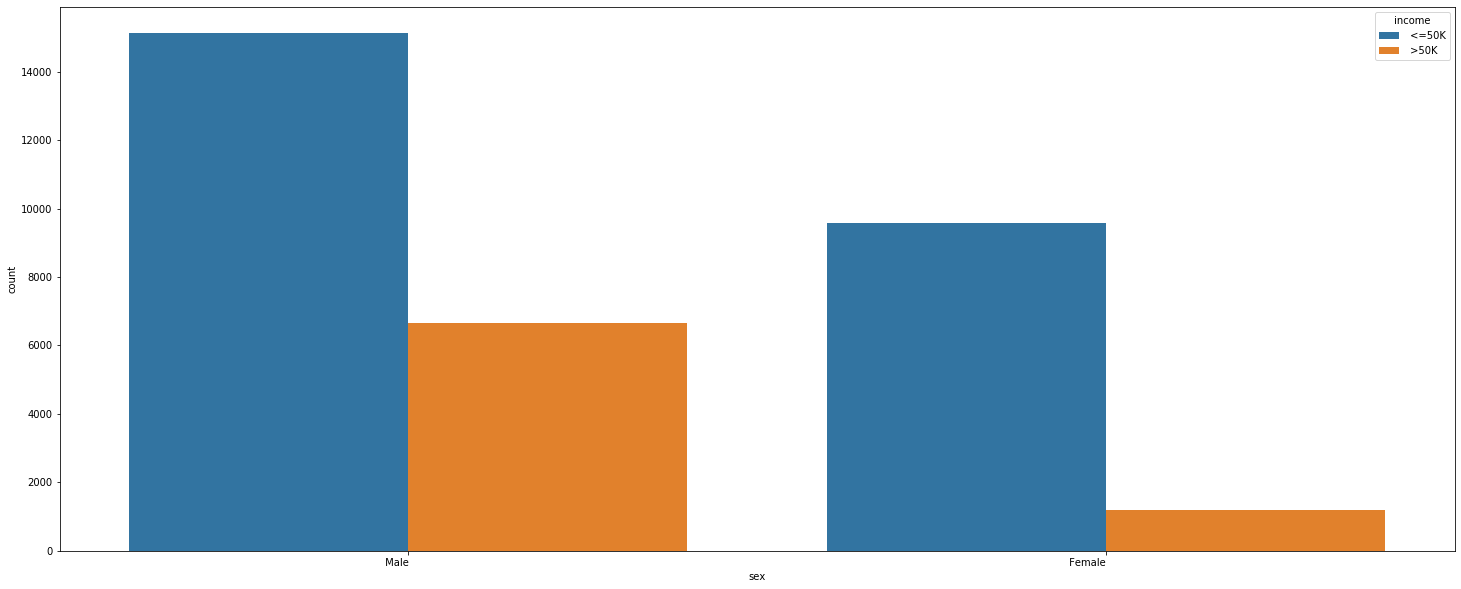

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(25,10))
ax = sns.countplot(df1['sex'],hue = df1.income,)
plt.xticks(rotation = 0, ha='right')

In [139]:
df.sex = df.sex.replace({' Male': '1' ,' Female': '0'})

In [140]:
df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,1,2174,0,40,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,United-States,<=50K,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,Cuba,<=50K,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,United-States,<=50K,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,154374,9,1,0,0,40,United-States,>50K,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,151910,9,0,0,0,40,United-States,<=50K,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,201490,9,1,0,0,20,United-States,<=50K,0,...,0,0,1,0,0,0,0,0,0,1


In [141]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
?                                583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [142]:
df['native-country'] = df['native-country'].replace({'?':'unknown'})

In [143]:
df = pd.concat((df, pd.get_dummies(df['native-country'])),axis=1)

In [144]:
df = df.drop('native-country',axis=1)

In [145]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [146]:
df['income'] = df['income'].replace({' <=50K':'1',' >50K':'0'})

In [147]:
y_data=df['income']
y_data

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: income, Length: 32561, dtype: object

In [148]:
x_data = df.drop(['income'], axis=1)
x_data

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Never-worked,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,unknown
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32558,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Splitting and Transformation of the data

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(x_data,y_data, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# KNN 

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_range= range(1,10)
knnscore=[]

for k in knn_range:
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train , cv = 5)
    
    knnscore.append(scores.mean())
print(knnscore)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

[0.7940204521108293, 0.7700237444883158, 0.8171573011530032, 0.8095814512289653, 0.8275997294369286, 0.8223173836903609, 0.8287874147803873, 0.8255526130228537, 0.828255357684256]
Cross-validation scores: [0.83029683 0.82821458 0.83128583 0.82534808 0.82613148]
Average cross-validation score: 0.8283


Text(0, 0.5, 'Cross validated scores')

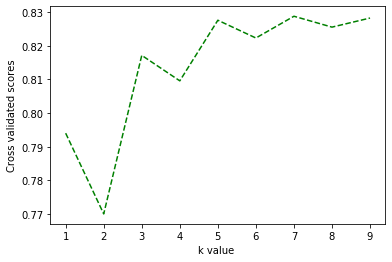

In [65]:
x_axis = range(1,10)
plt.plot(knn_range,knnscore,linestyle='--',color='green')
plt.xlabel('k value ')
plt.ylabel('Cross validated scores')

In [67]:
from sklearn.model_selection import GridSearchCV
knn_range = range(1,5)
param_grid = dict(n_neighbors=knn_range)
Score = 0 

for k in knn_range:
    Grid_Search = GridSearchCV(knn,param_grid, cv=5)
    Grid_Search.fit(X_train, y_train)
    Test_Score=Grid_Search.score(X_test,y_test)
    
if  Test_Score > Score:
    Score = Test_Score 
    best_parameters={k}
    
print("Best parameters: {}".format(Grid_Search.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_Search.best_score_))
print("Best Test set score : {:.4f}".format(Test_Score))

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.8172
Best Test set score : 0.8137
Best parameters:  {4}


###  KNN with Best parameters

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [162]:
print("Accuracy on train set: {:.5f}".format(knn.score(X_train, y_train)))

Accuracy on train set: 0.89525


In [81]:
print("Accuracy on test set: {:.5f}".format(knn.score(X_test, y_test)))

Accuracy on test set: 0.81366


### Prediction

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

### Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, knn_predict)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1126  856]
 [ 661 5498]]


### Classification Matrix

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_predict, target_names=["<=50K", ">=50K"]))

              precision    recall  f1-score   support

       <=50K       0.63      0.57      0.60      1982
       >=50K       0.87      0.89      0.88      6159

    accuracy                           0.81      8141
   macro avg       0.75      0.73      0.74      8141
weighted avg       0.81      0.81      0.81      8141



# Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV

penalty = ['l1' ,'l2']
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

logmodel = LogisticRegression(solver='liblinear',max_iter = 12000)
parameters = { 'penalty': ['l1','l2'] , 'C':c}
logistic = GridSearchCV(logmodel,param_grid = parameters,cv=3)
logistic.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=12000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [165]:
print("Best Cross Validation score: {:.6f}".format(logistic.best_score_))

Best Cross Validation score: 0.852129


In [166]:
print("Best parameters: {}".format(logistic.best_params_))

Best parameters: {'C': 10, 'penalty': 'l2'}


### Test Score with the best parameters 

In [85]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear',max_iter = 12000, penalty = 'l2', C = 10)
logmodel.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=12000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
print("Accuracy on train set: {:.5f}".format(logmodel.score(X_train, y_train)))

Accuracy on train set: 0.85299


In [86]:
print("Accuracy on test set: {:.5f}".format(logmodel.score(X_test, y_test)))

Accuracy on test set: 0.85014


### Prediction

In [87]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear',max_iter = 12000, penalty = 'l2', C = 10)
logmodel.fit(X_train,y_train)
logmodel_predict = logmodel.predict(X_test)

### Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, logmodel_predict)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1201  781]
 [ 439 5720]]


### Classification Matrix 

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logmodel_predict, target_names=["<=50K", ">=50K"]))


              precision    recall  f1-score   support

       <=50K       0.73      0.61      0.66      1982
       >=50K       0.88      0.93      0.90      6159

    accuracy                           0.85      8141
   macro avg       0.81      0.77      0.78      8141
weighted avg       0.84      0.85      0.85      8141



# Linear Support Vector Machine

In [98]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score,GridSearchCV

penalty = ['l2']
c = [0.001, 0.01, 0.1, 1, 10, 100]

svc = LinearSVC(random_state = 0 ,max_iter = 120000 ,C = c)
parameters = { 'penalty': ['l2'] , 'C':c}
svc = GridSearchCV(svc,param_grid = parameters,cv=3)
svc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearSVC(C=[0.001, 0.01, 0.1, 1, 10, 100],
                                 class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=120000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
print("Best score: {:.4f}".format(svc.best_score_))

Best score: 0.8517


In [100]:
print("Best parameters: {}".format(svc.best_params_))

Best parameters: {'C': 1, 'penalty': 'l2'}


### Test score with the best parameters

In [159]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state = 0 ,max_iter = 120000 ,C = 1, penalty = 'l2')
svc.fit(X_train, y_train)
svc.fit(X_test,y_test)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=120000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [160]:
print("Accuracy on train set: {:.5f}".format(svc.score(X_train, y_train)))

Accuracy on train set: 0.84808


In [185]:
print("Accuracy on test set: {:.5f}".format(svc.score(X_test, y_test)))

Accuracy on test set: 0.85407


### Prediction

In [187]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state = 0 ,max_iter = 120000 ,C = 1, penalty = 'l2')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

### Confusion Matrix 

In [188]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, svc_predict)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1186  796]
 [ 413 5746]]


### Classification Matrix

In [189]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc_predict, target_names=["<=50K", ">=50K"]))

              precision    recall  f1-score   support

       <=50K       0.74      0.60      0.66      1982
       >=50K       0.88      0.93      0.90      6159

    accuracy                           0.85      8141
   macro avg       0.81      0.77      0.78      8141
weighted avg       0.85      0.85      0.85      8141



# Kernelized Support Vector Machine  (RBF)

In [97]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score,GridSearchCV

g = [0.01, 0.1, 1, 10, 100]
c = [100]

svm = SVC(kernel = 'rbf', gamma=g, C=c, random_state=0)
parameters = {'C':c, 'gamma':g }
svm = GridSearchCV(svm,param_grid = parameters,cv=3)
svm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=[100], cache_size=200, class_weight=None,
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma=[0.01, 0.1, 1, 10, 100], kernel='rbf',
                           max_iter=-1, probability=False, random_state=0,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100], 'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
print("Best score: {:.4f}".format(svm.best_score_))

Best score: 0.8523


In [99]:
print("Best parameters: {}".format(svm.best_params_))

Best parameters: {'C': 100, 'gamma': 0.01}


### Test score with best parameters for Kernelized SVM (RBF)

In [100]:
from sklearn.svm import SVC, LinearSVC

svm = SVC(kernel = 'rbf', gamma=0.01, C=100, random_state=0)
svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [157]:
print("Accuracy on train set: {:.5f}".format(svm.score(X_train, y_train)))

Accuracy on train set: 0.85999


In [101]:
print("Accuracy on test set: {:.5f}".format(svm.score(X_test, y_test)))

Accuracy on test set: 0.85248


### Prediction

In [103]:
from sklearn.svm import SVC, LinearSVC

svm = SVC(kernel = 'rbf', gamma=0.01, C=100, random_state=0)
svm.fit(X_train, y_train)
svm_rbf = svm.predict(X_test)

### Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, svm_rbf)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1150  832]
 [ 369 5790]]


### Classification Report 

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_rbf, target_names=["<=50K", ">=50K"]))

              precision    recall  f1-score   support

       <=50K       0.76      0.58      0.66      1982
       >=50K       0.87      0.94      0.91      6159

    accuracy                           0.85      8141
   macro avg       0.82      0.76      0.78      8141
weighted avg       0.85      0.85      0.85      8141



# Kernelized Support Vector Machine (LINEAR)

In [121]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score,GridSearchCV

c = [0.001, 0.01, 0.1, 1, 10, 100]

Linearsvm = SVC(kernel = 'linear', C=c, verbose=True)
parameters = {'C':c}
Linearsvm = GridSearchCV(Linearsvm,param_grid = parameters ,cv=3)
Linearsvm.fit(X_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=[0.001, 0.01, 0.1, 1, 10, 100], cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=True),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
print("Best score: {:.4f}".format(Linearsvm.best_score_))

Best score: 0.8514


In [124]:
print("Best parameters: {}".format(Linearsvm.best_params_))

Best parameters: {'C': 100}


### Test score with best parameters for Linear SVC

In [153]:
from sklearn.svm import SVC, LinearSVC

Linearsvm = SVC(kernel = 'linear', C=100,)
Linearsvm.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [154]:
print("Accuracy on train set: {:.5f}".format(Linearsvm.score(X_train, y_train)))

Accuracy on train set: 0.85242


In [190]:
print("Accuracy on test set: {:.5f}".format(Linearsvm.score(X_test, y_test)))

Accuracy on test set: 0.85383


### Prediction

In [192]:
from sklearn.svm import SVC, LinearSVC

Linearsvm = SVC(kernel = 'linear', C=100,)
Linearsvm.fit(X_train,y_train)
Linearsvm = Linearsvm.predict(X_test)

### Confusion Matrix

In [193]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, Linearsvm)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1159  823]
 [ 391 5768]]


### Classification Report 

In [194]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Linearsvm, target_names=["<=50K", ">=50K"]))

              precision    recall  f1-score   support

       <=50K       0.75      0.58      0.66      1982
       >=50K       0.88      0.94      0.90      6159

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



# SVM (POLY)

In [47]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings 
warnings.simplefilter('ignore')

c = [0.001,0.01,0.1,1,10,100]
d = [3,5,7,10]
Polysvm = SVC(kernel = 'poly', degree = d ,C = c, verbose=True)
parameters = {'C': c,'degree':d}
Polysvm = GridSearchCV(Polysvm,param_grid = parameters ,cv=3)
Polysvm.fit(X_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=[0.001, 0.01, 0.1, 1, 10, 100], cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=[3, 5, 7, 10],
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=True),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [3, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
print("Best score: {:.4f}".format(Polysvm.best_score_))

Best score: 0.8277


In [49]:
print("Best parameters: {}".format(Polysvm.best_params_))

Best parameters: {'C': 100, 'degree': 3}


### Test and Train score using the best parameters SVM(POLY)

In [150]:
from sklearn.svm import SVC, LinearSVC
Polysvm = SVC(kernel = 'poly', degree = 3 ,C = 100, verbose=True)
Polysvm.fit(X_train,y_train)

/Users/chaitanya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [151]:
print("Accuracy on training set: {:.5f}".format(Polysvm.score(X_train, y_train)))

Accuracy on training set: 0.83071


In [152]:
print("Accuracy on test set: {:.5f}".format(Polysvm.score(X_test, y_test)))

Accuracy on test set: 0.82815


### Prediction

In [196]:
from sklearn.svm import SVC, LinearSVC
Polysvm = SVC(kernel = 'poly', degree = 3 ,C = 100, verbose=True)
Polysvm.fit(X_train,y_train)
Polysvm = Polysvm.predict(X_test)

[LibSVM]

### Confusion Matrix

In [197]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, Polysvm)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 913 1069]
 [ 330 5829]]


### Classification Report 

In [198]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Polysvm, target_names=["<=50K", ">=50K"]))

              precision    recall  f1-score   support

       <=50K       0.73      0.46      0.57      1982
       >=50K       0.85      0.95      0.89      6159

    accuracy                           0.83      8141
   macro avg       0.79      0.70      0.73      8141
weighted avg       0.82      0.83      0.81      8141



# Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

depth=[2,3,4,6,8,10,12]
samples_split=[2,3,4,5,6,7,8]
criteria = ['entropy','gini']

decision_tree = DecisionTreeClassifier(random_state=0)
parameters = {'min_samples_split': samples_split,'max_depth': depth, 'criterion': criteria}
decision_tree = GridSearchCV(decision_tree,param_grid = parameters ,cv=3)
decision_tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 6, 8, 10, 12],
                 

In [129]:
print("Best cross validation score: {:.4f}".format(decision_tree.best_score_))

Best cross validation score: 0.8539


In [130]:
print("Best parameters: {}".format(decision_tree.best_params_))

Best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 7}


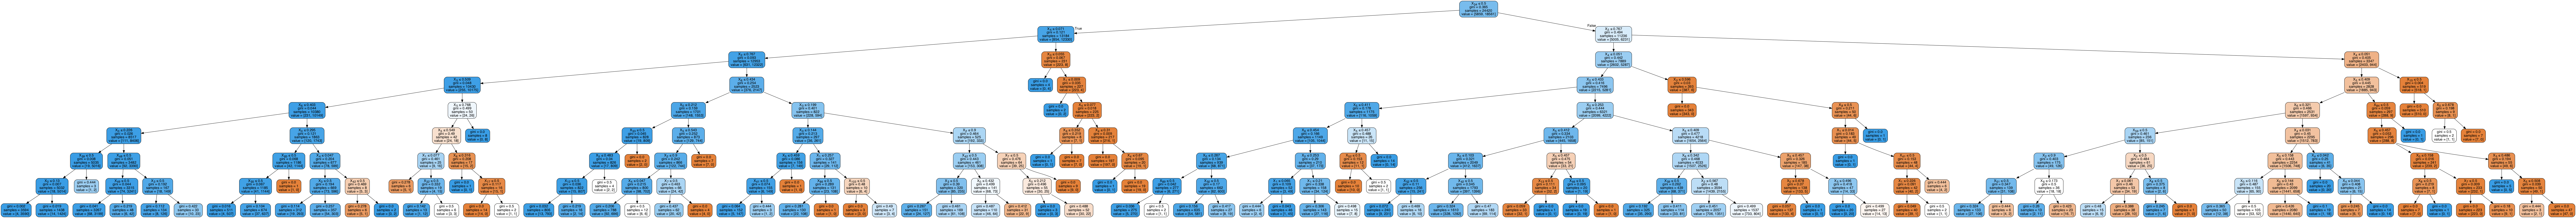

In [115]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Decision_Tree = tree.DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=8, min_samples_split=7)
Decision_Tree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(Decision_Tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Train and Test score with the best parameters

In [90]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=8, min_samples_split=7)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [106]:
print("Accuracy on training set: {:.5f}".format(decision_tree.score(X_train, y_train)))

Accuracy on training set: 0.86196


In [91]:
print("Accuracy on test set: {:.5f}".format(decision_tree.score(X_test, y_test)))

Accuracy on test set: 0.85653


### Prediction

In [94]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=8, min_samples_split=7)
decision_tree.fit(X_train, y_train)
DT = decision_tree.predict(X_test)

### Confusion Matrix 

In [95]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, DT)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1098  884]
 [ 284 5875]]


### Classification Matrix 

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, DT, target_names=["<=50K", ">=50K"]))

              precision    recall  f1-score   support

       <=50K       0.79      0.55      0.65      1982
       >=50K       0.87      0.95      0.91      6159

    accuracy                           0.86      8141
   macro avg       0.83      0.75      0.78      8141
weighted avg       0.85      0.86      0.85      8141



### After preprocessing the accuracy values after solving the algorithms 

## KNN -
Hyperparameters - number of neighbours ( 3 ) 

Accuracy - 0.81 

## Logistic Regression -

Hyperparameters - penalty ('l2') 

Accuracy - 0.85

## Linear SVC 

Hyperparameters - penalty ('l2') , C = 1

Accuracy - 0.85

## Kernelized SVM ( RBF ) 

Hyperparameters - gamma ( 0.01 ) , C = 100

Accuracy - 0.85

## Kernelized SVM ( Linear )

Hyperparameters - C = 100

Accuracy - 0.85

## Kernelized SVM ( Poly )

Hyperparameters - degree = 3 , C = 100

Accuracy - 0.83

## Decision Tree 

Hyperparameters - criterion=gini, max_depth=8, min_samples_split=7

Accuracy - 0.86

So based on the above algorithms I would choose Decision Tree because among the above algorithms since the accuracy is 0.86 and the hyperparameters bieng low and the decision tree also provides the best classification based on the precision, recall, f-1 score, support.

# Regression

In [3]:
!pip install selenium

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [58]:
import selenium
from selenium import webdriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection

In [3]:
df = pd.read_csv ('train_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks',
                               'UPDRS', 
                               'class_information']) 
df_val = pd.read_csv ('test_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks', 
                               'class_information']) 

## Data Visualization

### Distribution of UPDRS scores

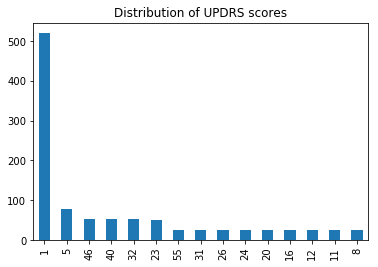

In [14]:
title = "Distribution of UPDRS scores"
to_plot = df.UPDRS.value_counts(dropna=True)
to_plot.plot.bar(title=title)
plt.show()

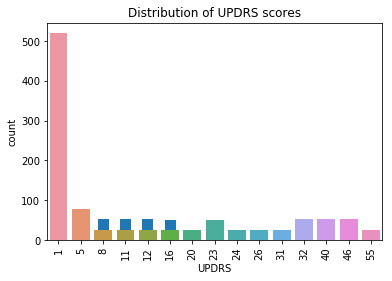

In [5]:
sns.countplot(df['UPDRS'],label="Count")
plt.show()

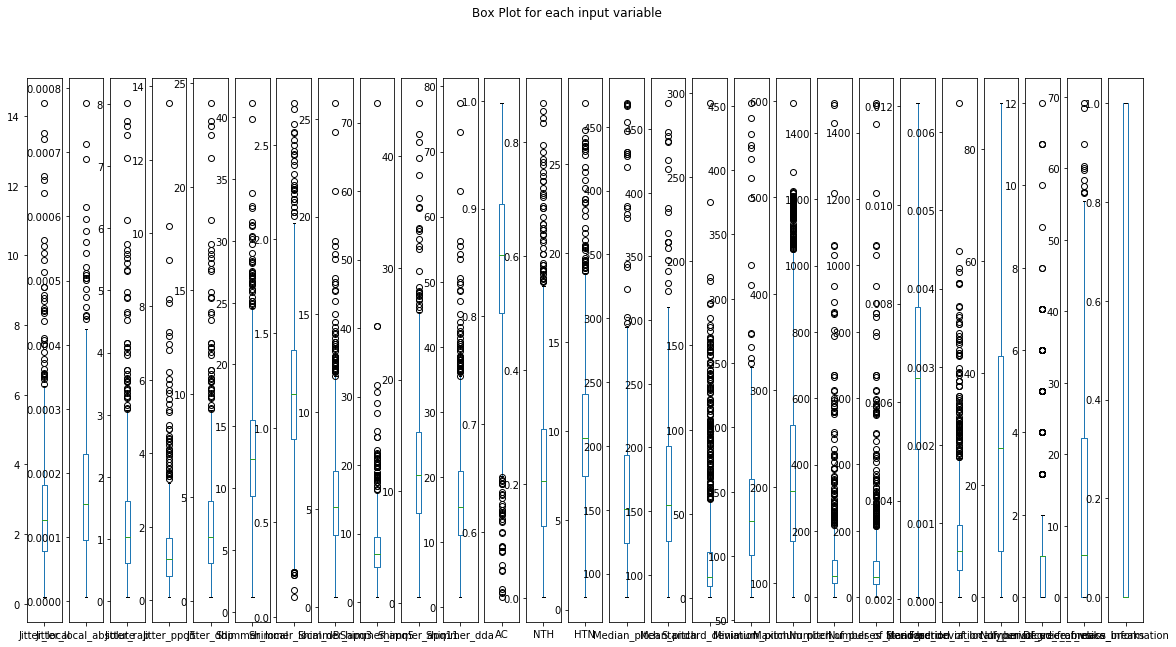

In [6]:
df.drop('UPDRS', axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,10), 
                                        title='Box Plot for each input variable')
plt.show()

### Description on the UPDRS score to Features

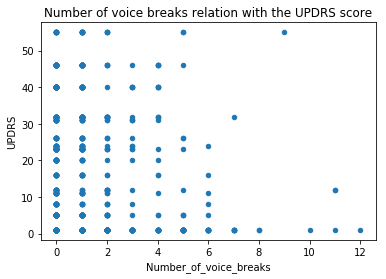

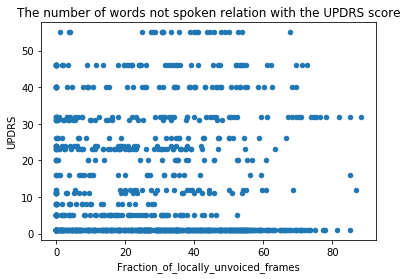

In [6]:
title = "Number of voice breaks relation with the UPDRS score"
df.plot.scatter("Number_of_voice_breaks", "UPDRS",title=title)

title = "The number of words not spoken relation with the UPDRS score"
df.plot.scatter("Fraction_of_locally_unvoiced_frames", "UPDRS",title=title)

plt.show()

## Data Exploration

In [7]:
# This is train dataset
df.head() 

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,UPDRS,class_information
id,,,,,,,,,,,,,,,,,,,,,
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1


In [8]:
# This is test dataset
df_val.head().T

id,1,1,1,1,1
Jitter_local,0.143000,0.162000,0.140000,0.150000,0.208000
Jitter_local_absolute,0.000007,0.000008,0.000007,0.000007,0.000009
Jitter_rap,0.073000,0.087000,0.075000,0.080000,0.077000
Jitter_ppq5,0.081000,0.089000,0.089000,0.097000,0.095000
Jitter_ddp,0.219000,0.260000,0.224000,0.240000,0.230000
Shimmer_local,1.236000,1.338000,1.086000,1.049000,1.241000
Shimmer_local_dB,0.107000,0.117000,0.094000,0.091000,0.109000
Shimmer_apq3,0.612000,0.630000,0.556000,0.533000,0.487000
Shimmer_apq5,0.904000,0.948000,0.747000,0.698000,0.715000
Shimmer_apq11,0.894000,1.017000,0.823000,0.777000,1.568000


In [9]:
df.shape

(1039, 28)

In [11]:
df_val.shape

(167, 27)

## Make missing values

In [11]:
copy_df = df.copy()

In [12]:
# random pick two values from each column to set to None
copy_df.iloc[100,0] = copy_df.iloc[523,0] = None
copy_df.iloc[152,1] = copy_df.iloc[677,1] = None
copy_df.iloc[251,2] = copy_df.iloc[863,2] = None
copy_df.iloc[200,3] = copy_df.iloc[996,3] = None
copy_df.iloc[78,4] = copy_df.iloc[999,4] = None
copy_df.iloc[365,5] = copy_df.iloc[656,5] = None
copy_df.iloc[688,6] = copy_df.iloc[11,6] = None
copy_df.iloc[1000,7] = copy_df.iloc[98,7] = None
copy_df.iloc[654,8] = copy_df.iloc[204,8] = None
copy_df.iloc[196,9] = copy_df.iloc[500,9] = None
copy_df.iloc[101,10] = copy_df.iloc[674,10] = None
copy_df.iloc[262,11] = copy_df.iloc[897,11] = None
copy_df.iloc[586,12] = copy_df.iloc[224,12] = None
copy_df.iloc[1021,13] = copy_df.iloc[477,13] = None
copy_df.iloc[446,14] = copy_df.iloc[234,14] = None
copy_df.iloc[25,15] = copy_df.iloc[854,15] = None
copy_df.iloc[420,16] = copy_df.iloc[341,16] = None
copy_df.iloc[170,17] = copy_df.iloc[514,17] = None
copy_df.iloc[342,18] = copy_df.iloc[728,18] = None
copy_df.iloc[682,19] = copy_df.iloc[309,19] = None
copy_df.iloc[441,20] = copy_df.iloc[883,20] = None
copy_df.iloc[774,21] = copy_df.iloc[234,21] = None
copy_df.iloc[215,22] = copy_df.iloc[987,22] = None
copy_df.iloc[501,23] = copy_df.iloc[563,23] = None
copy_df.iloc[903,24] = copy_df.iloc[781,24] = None
copy_df.iloc[322,25] = copy_df.iloc[124,25] = None
copy_df.iloc[857,26] = copy_df.iloc[237,26] = None
copy_df.iloc[787,27] = copy_df.iloc[320,27] = None

In [13]:
# Check NA 
na_counts = copy_df.isnull().sum()
print("Number of na in each column:\n{}".format(na_counts))

Number of na in each column:
Jitter_local                           2
Jitter_local_absolute                  2
Jitter_rap                             2
Jitter_ppq5                            2
Jitter_ddp                             2
Shimmer_local                          2
Shimmer_local_dB                       2
Shimmer_apq3                           2
Shimmer_apq5                           2
Shimmer_apq11                          2
Shimmer_dda                            2
AC                                     2
NTH                                    2
HTN                                    2
Median_pitch                           2
Mean_pitch                             2
Standard_deviation                     2
Minimum_pitch                          2
Maximum_pitch                          2
Number_of_pulses                       2
Number_of_periods                      2
Mean_period                            2
Standard_deviation_of_period           2
Fraction_of_locally_unvoiced

## Data Modeling

In [14]:
train_imputed = copy_df.transform(lambda grp: grp.fillna(grp.median()))

target = train_imputed.UPDRS
train_imputed.drop(['UPDRS'], axis='columns', inplace=True)
X = train_imputed

### Split the train dataset and test with cross validation

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (779, 27)
y_train shape: (779,)
X_test shape: (260, 27)
y_test shape: (260,)


## Standardize values

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

### Linear Model

In [17]:
# Train a LinearRegression model on the train dataset
import sklearn
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# the train and test score of the model
print("Train set score: {:.4f}".format(regr.score(X_train_scaled,y_train)))
print("Test set score: {:.4f}".format(regr.score(X_test_scaled,y_test)))

Train set score: 0.6027
Test set score: 0.5733


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

penalty = ['l1' ,'l2']
c = [ 0.01, 0.1, 1, 10, 100]

logreg = LogisticRegression(solver='liblinear',max_iter = 10000)
parameters = { 'penalty': ['l1','l2'] , 'C':c}
logistic = GridSearchCV(logreg,param_grid = parameters,cv=3)
logistic.fit(X_train_scaled, y_train)

    
print('Best Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logistic.score(X_train_scaled, y_train)))
print('Best Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logistic.score(X_test_scaled, y_test)))
print("Best parameters: {}".format(logistic.best_params_))

Best Accuracy of Logistic regression classifier on training set: 0.85
Best Accuracy of Logistic regression classifier on test set: 0.72
Best parameters: {'C': 10, 'penalty': 'l1'}


In [24]:
logistic = LogisticRegression(solver='liblinear',max_iter = 10000, penalty = 'l1', C = 10)
logistic.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
print("Accuracy on test set: {:.5f}".format(logistic.score(X_test, y_test)))

Accuracy on test set: 0.66538


In [27]:
# prediction
logistic_predict = logistic.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, logistic_predict)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[136   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   9   1   2   0   0   2   1   2   1   0   0   0   0   1]
 [  0   0   0   0   0   2   0   1   0   1   0   2   0   1   0]
 [  0   0   0   2   0   2   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   4   0   1   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   2]
 [  0   0   0   1   0   0   1   0   0   0   0   0   3   1   0]
 [  1   6   0   0   0   0   2   2   0   0   1   1   1   1   0]
 [  0   4   1   0   0   1   0   0   0   0   0   0   0   2   0]
 [  0   2   0   0   0   0   0   0   0   1   0   0   2   3   0]
 [  0   4   0   0   0   0   0   2   0   0   1   0   0   0   0]
 [  0   0   1   1   0   1   0   0   0   0   0   6   2   0   1]
 [  0   3   0   0   0   0   0   0   0   0   0   0   4   0   0]
 [  0   4   0   0   0   0   0   1   0   1   0   1   3   2   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   2   0   3]]


### LASSO

In [35]:
from sklearn import linear_model
for i in [0.0001,0.001,0.01,1]:
    lasso = linear_model.Lasso(alpha=i,max_iter=10000)
    lasso.fit(X_train_scaled,y_train)
    print('Lasso regression with alpha value of {0} generates coeffiecents of: '.format(i))
    print('{0} and intercept of {1}'.format(lasso.coef_,lasso.intercept_))
    print("Train set score: {:.4f}".format(lasso.score(X_train_scaled,y_train)))
    print("Test set score: {:.4f}".format(lasso.score(X_test_scaled,y_test)))
    print()

Lasso regression with alpha value of 0.0001 generates coeffiecents of: 
[ -1.09788663  -0.77047012  18.70684039  -0.41802211 -14.95167568
   2.73729183  -1.8511569   -0.           0.04085201   0.8823573
  -0.81275903   2.6729412    0.04516656  -1.28327754  -0.93708562
  -2.59674377   2.34308694   0.19112287   0.07890491   1.66284917
  -0.90870223  -1.71997484  -2.05387329   2.47786242  -0.78449726
  -0.46080811  11.77402844] and intercept of 13.237483953786896
Train set score: 0.6027
Test set score: 0.5735

Lasso regression with alpha value of 0.001 generates coeffiecents of: 
[ -1.07391018  -0.78451651  17.18427372  -0.41265711 -13.44462814
   2.6936137   -1.81118086  -0.           0.0360197    0.88207493
  -0.79972179   2.59935909  -0.          -1.25224004  -0.94539221
  -2.55953532   2.31376725   0.16471944   0.0868562    1.54043841
  -0.79068441  -1.70876231  -2.04652888   2.47585952  -0.78347395
  -0.46056627  11.76994995] and intercept of 13.237483953786898
Train set score: 0.602

### Ridge

In [36]:
for i in [0.01,10,35]:
    ridge = linear_model.Ridge(alpha=i,max_iter=10000)
    ridge.fit(X_train_scaled,y_train)
    print('Ridge regression with alpha value of {0} generates coeffiecents of: '.format(i))
    print('{0} and intercept of {1}'.format(lasso.coef_,lasso.intercept_))
    print("Train set score: {:.4f}".format(lasso.score(X_train_scaled,y_train)))
    print("Test set score: {:.4f}".format(lasso.score(X_test_scaled,y_test)))
    print()

Ridge regression with alpha value of 0.01 generates coeffiecents of: 
[ 0.          0.          0.21555328  0.          0.          0.
  0.          0.          0.          0.10846979  0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.47790447
 -0.         -0.         11.08136292] and intercept of 13.237483953786906
Train set score: 0.5705
Test set score: 0.5759

Ridge regression with alpha value of 10 generates coeffiecents of: 
[ 0.          0.          0.21555328  0.          0.          0.
  0.          0.          0.          0.10846979  0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.47790447
 -0.         -0.         11.08136292] and intercept of 13.237483953786906
Train set score: 0.5705
Test set score: 0.5759

Ridge regression with alpha value of 35 generates coeffiecents of: 
[ 0.          

### Polynomial

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.fit_transform(X_test_scaled)
X_train_scaled_poly.shape

(779, 406)

In [65]:
regr.fit(X_train_scaled_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
print("Train set score: {:.4f}".format(regr.score(X_train_scaled_poly,y_train)))
print("Test set score: {:.4f}".format(regr.score(X_test_scaled_poly,y_test)))
print()

Train set score: 0.8347
Test set score: -11495.5946



#### Polynomial does not fit

### Softmax

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=1000,random_state = 0)
softmax_reg.fit(X_train_scaled, y_train)
print("Train set score: {:.4f}".format(softmax_reg.score(X_train_scaled,y_train)))
print("Test set score: {:.4f}".format(softmax_reg.score(X_test_scaled,y_test)))

Train set score: 0.6791
Test set score: 0.6577


### Linear Support Vector Machine (SVM)

In [74]:
from sklearn.svm import SVC, LinearSVC
penalty = ['l2']
c = [  0.1, 1,10,100]

svc = LinearSVC(random_state = 0 ,max_iter = 100000 ,C = c)
parameters = { 'penalty': ['l2'] , 'C':c}
svc = GridSearchCV(svc,param_grid = parameters,cv=3)
svc.fit(X_train_scaled, y_train)
print("Best score: {:.4f}".format(svc.best_score_))
print("Best parameters: {}".format(svc.best_params_))

Best score: 0.7137
Best parameters: {'C': 10, 'penalty': 'l2'}


In [75]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state = 0 ,max_iter = 100000 ,C = 10, penalty = 'l2')
svc.fit(X_train_scaled, y_train)
svc.fit(X_test_scaled,y_test)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [77]:
print("Accuracy on test set: {:.5f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on test set: 0.87308


### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.69


### K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.66


## Support Vector Machine (SVM)

In [40]:
algorithme = svm.SVC()
algorithme.get_params()
cross_validation.cross_val_score(algorithme, X, target, n_jobs=-1)

array([0.49431818, 0.5       , 0.51032448])

In [42]:
# we go beyond default parameters using a Grid Search
parameters = {  'gamma' : [0.1,0.01, 0.001, 0.0001],
                'C'      : [100,1000, 10000],
                "probability" : [True],
                'kernel' : ['rbf', 'poly', 'sigmoid','linear'],
                "degree" : [1,3,5]}

grid_svm = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)

grid_svm.fit(X_train, y_train)

print (grid_svm.best_score_, grid_svm.best_estimator_)

0.742816091954023 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [43]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(grid_svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(grid_svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.76


### Due to the accuracy, the SVM degree=1, gamma=0.01, kernel='rbf' has the best performance